<H1 style="text-align: center">EEEM066 - Fundamentals of Machine Learning</H1>
<H1 style="text-align: center">Week 5: Support Vector Machine</H1>

> Dr. Xiatian (Eddy) Zhu, Dr Syed Sameed Husain

> xiatian.zhu@surrey.ac.uk, sameed.husain@surrey.ac.uk

**Introduction**

This lab is about the support vector machine (SVM).


A SVM is a supervised learning algorithm used in machine learning for classification and regression tasks. Its goal is to find the optimal decision boundary that separates data points from different classes.


Happy Programming!⚡⚡

# Contents
<!-- 1. Missing data imputation
2. Feature selection using Mutual gain
3. Feature selection using pearson correlation
4. Support Vector Machine -->

*   [Support Vector Machine](https://colab.research.google.com/drive/1zaoQVOrDGDbDaPO_NrVbVftbO5iwXsuM#scrollTo=0hLKLYDO3vkQ)


## Python libraries required
1. Numpy
2. Seaborn
3. Matplotlib
4. Sklearn
5. Pandas

## Support Vector Machine

In [3]:
# Pre-Modeling Tasks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
# Modeling
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

## upload provided file to the Files

df = pd.read_excel("Week_5_cancer_dataset.xlsx")
df= df.drop(['id'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

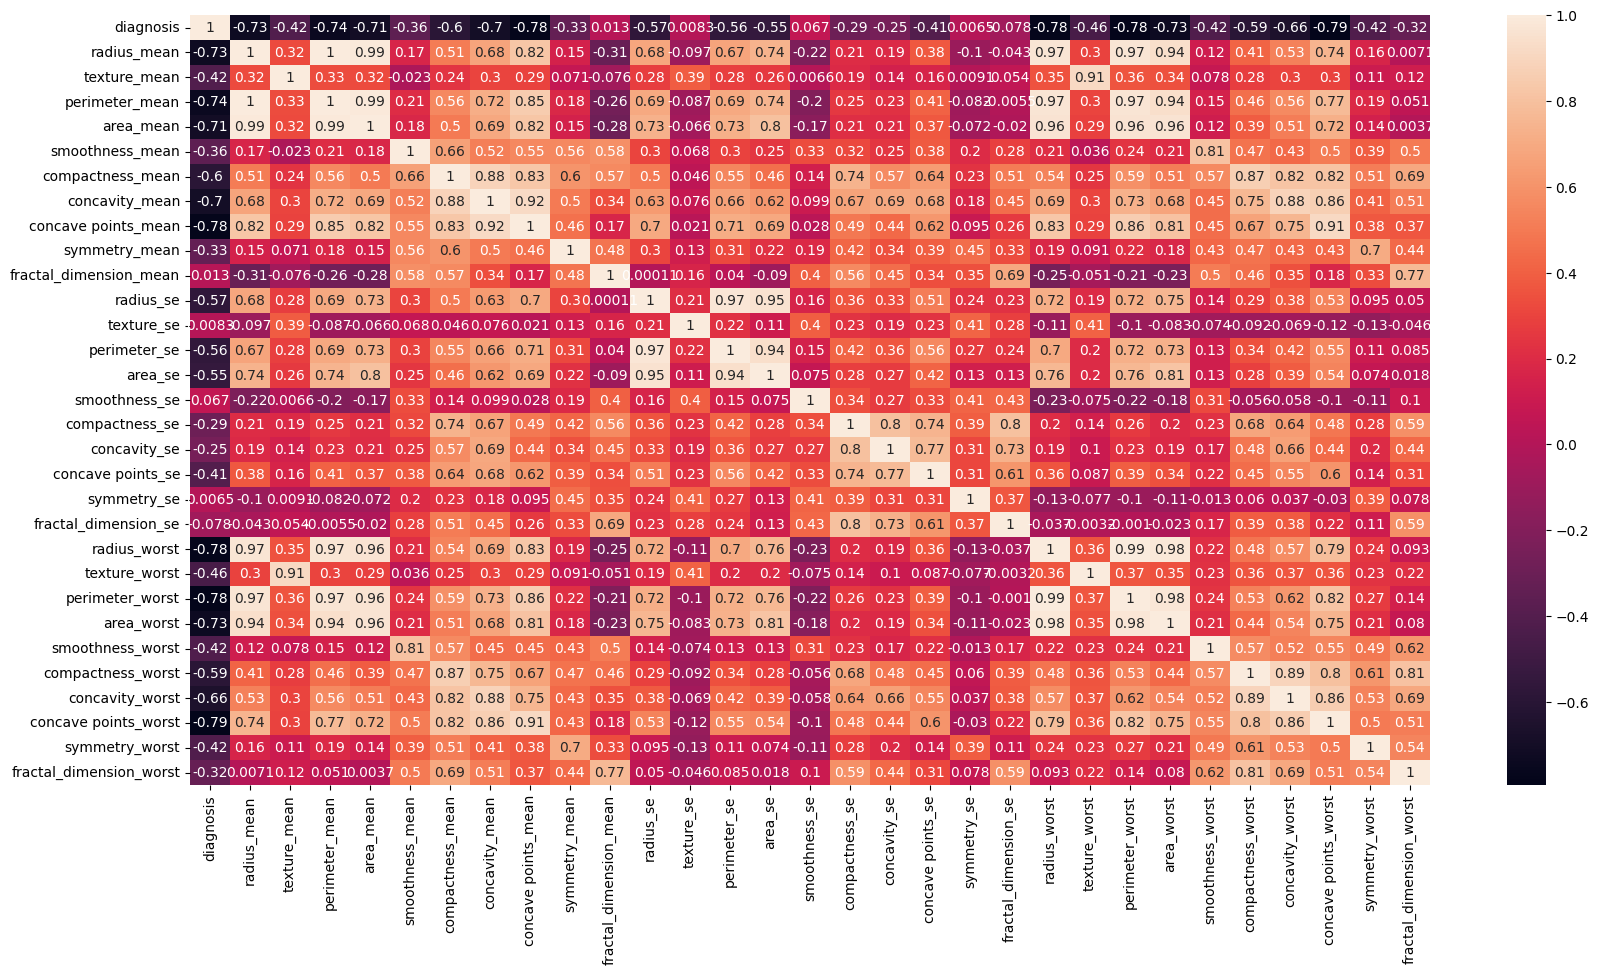

In [4]:
## details of dataset
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values


**Data Visualisation**

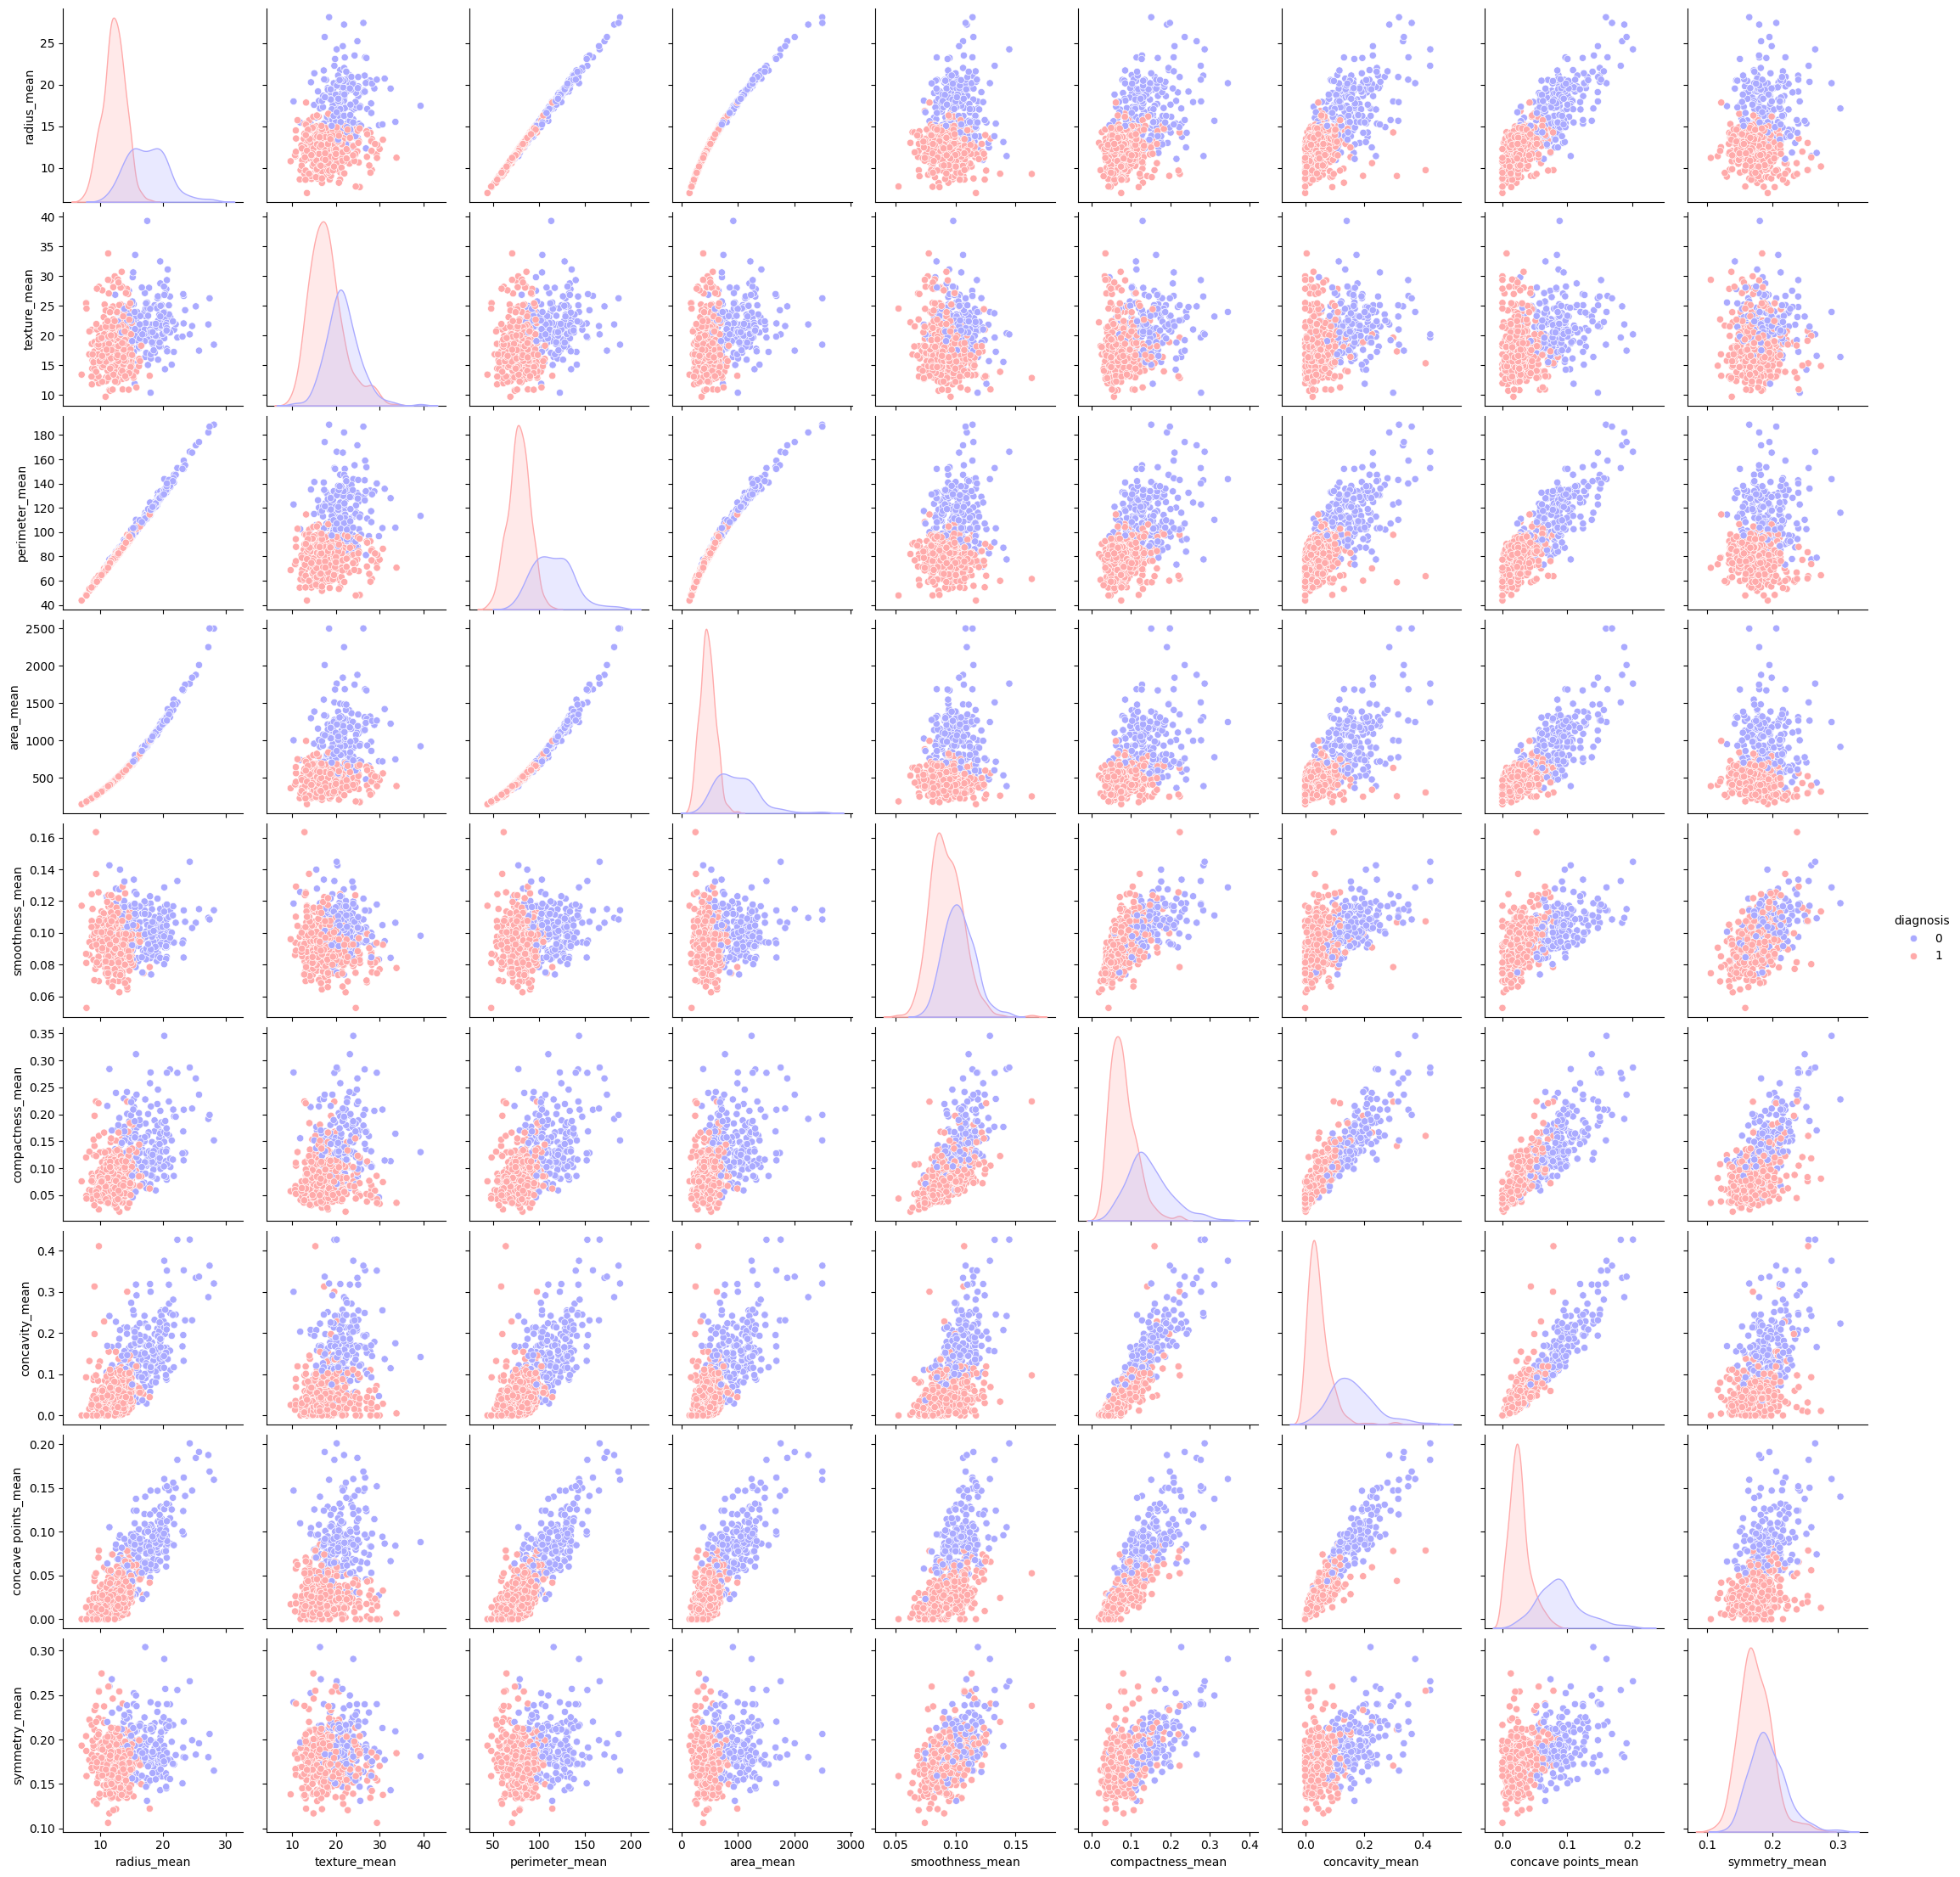

In [5]:
from pylab import rcParams

rcParams['figure.figsize'] = 8,5

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']

sns_plot = sns.pairplot(data=df[cols],hue='diagnosis', palette='bwr')

**Splitting the dataset**

In Machine learning we must split the dataset into training and testing data:

The training set called also learning set that we will use to train our model, it has the big part.

The testing set is used to evaluate the performance of the model.

So creating the test set is easy, we just select a few rondom rows, in general we give it 10% or 20%.

SKit_Learn provides a function of splitting the dataset into multiples subsets.

train_test_split(), is the simplest way wich the same as the function: split_train_test(), the method accepts lists, numpy arrays, scipy sparse matrices or pandas dataframes.

We will also identify some parameters, like the random_state that allows you to set the random generator seed.

The ideal split is said to be 80:20 for training and testing. You may need to adjust it depending on the size of the dataset and parameter complexity.

In [6]:
## Splitting the dataset in 80:20 partitiom
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                    test_size=0.2, random_state=42)

**Feature Scaling**
Feature scaling is a method used to standardize the range of independent variables or features of data. Scaling the data is very important to boost the score.

Feature Scaling, is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range.

For scaling the dataset we use Standardization method

Standardization : it substract the mean value( so standardized values always have a zero mean), and then it divides by the standard deviation.

Sckit-Learn provides a transformer caller StandardScaler. The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.


In [7]:
## Apply z-score normalization to data
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)


**Modeling**

In this part we will use SVM to train on training data.

In [8]:
# Support Vector classifier
svc = SVC()
## train our SVM model with our “training” dataset.
svc.fit(X_train,y_train)

SVC()

**Evaluation of the trained SVM model**


0.9824561403508771


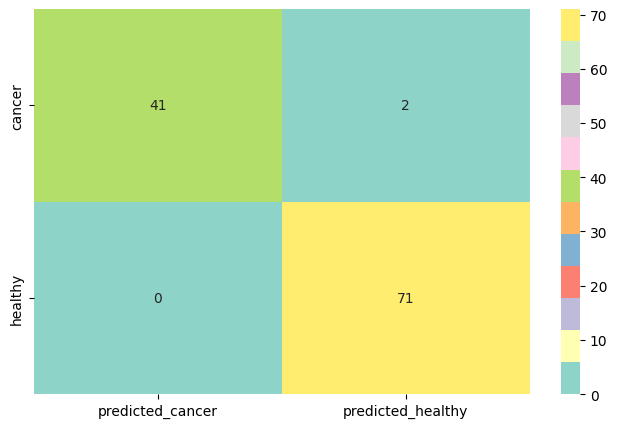

In [9]:
## use our trained model to make a
# prediction using our testing data
y_predict = svc.predict(X_test)
## Confusion matrix
cm = np.array(confusion_matrix(y_test, y_predict))
confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])
sns.heatmap(confusion_mat,annot=True,fmt='g',cmap='Set3')
print(accuracy_score(y_test, y_predict))